In [4]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
# mpl.use('Agg')
from matplotlib import pyplot as plt
import seaborn as sns

from viz_helpers import (COLOR_BLUE, COLOR_WHITE, COLOR_YELLOW, COLOR_ORANGE, COLOR_GREEN, COLOR_PINK, set_cycler,
                         build_color_mapper)


In [15]:
plt.style.use('paper')

def plot_legend(appearance_configs, labels, output, ncols=2):

    handles = []
    for config in appearance_configs:
        color, shape, size = config
        h = plt.plot([],[],marker=shape, color=color, 
                     markersize=size,
                     ls="none")[0]
        handles.append(h)

    legend = plt.legend(handles, labels, loc=2,
                        framealpha=1, frameon=False,
                        ncol=ncols,
                        numpoints=1)
    plt.axis('off')
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(output, dpi="figure", bbox_inches=bbox)
# plt.show()

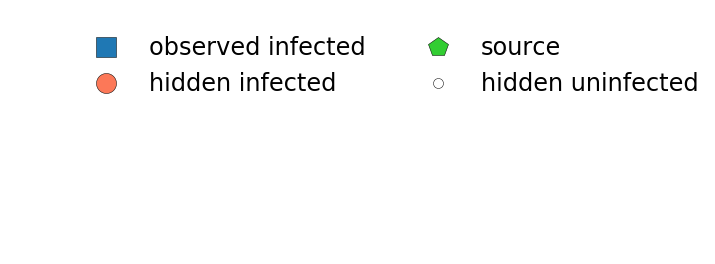

In [23]:
appearance_configs = [
    (COLOR_BLUE, 's', 20), (COLOR_ORANGE, 'o', 20), 
    (COLOR_GREEN, 'p', 20), (COLOR_WHITE, 'o', 10)
]
labels = ['observed infected', 'hidden infected', 'source', 'hidden uninfected']
plot_legend(appearance_configs, labels, 'figs/case-study/ground_truth_legend.pdf')

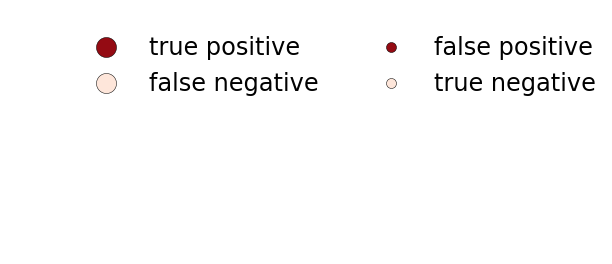

In [26]:
pal = sns.color_palette("Reds", n_colors=10)
mapper = build_color_mapper(pal, 0, 1.0)


appearance_configs = [
    (mapper(1.0), 'o', 20), (mapper(0.0), 'o', 20), 
    (mapper(1.0), 'o', 10), (mapper(0.0), 'o', 10)
]
labels = ['true positive', 'false negative', 'false positive', 'true negative']
plot_legend(appearance_configs, labels, 'figs/case-study/prediction_legend.pdf', 2)

In [6]:
def plot_legend(labels, name):
    ax = plt.subplot()
    set_cycler(ax)
    size = 32
    handles = []
    # for config in method_configs:
    for label in labels:
        if False:
            color, shape, linestyle = config
            h = ax.plot([],[], marker=shape, color=color,                  
                         linestyle=linestyle,
                         markersize=size)[0]
        else:
            h = ax.plot([], [], markersize=size)[0]
        handles.append(h)

    legend = ax.legend(handles, labels, loc=2,
                       framealpha=1, frameon=False,
                       fontsize=32,
                       ncol=3)
    ax.axis('off')
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('figs/{}.pdf'.format(name), dpi="figure", bbox_inches=bbox)

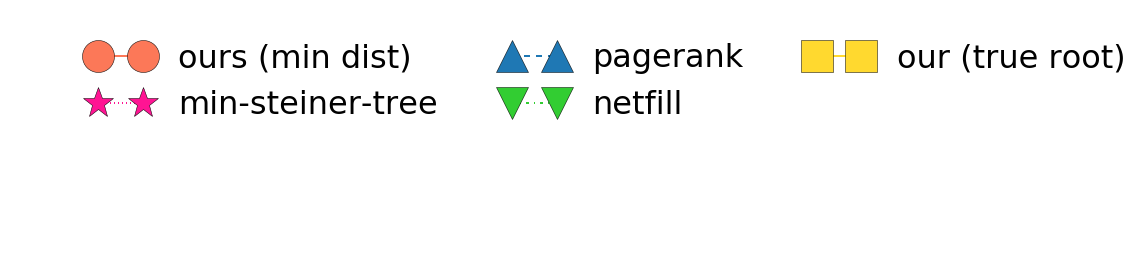

In [7]:
labels = ['ours (min dist)', 'min-steiner-tree', 'pagerank', 'netfill', 'our (true root)']
plot_legend(labels, 'method_legend')

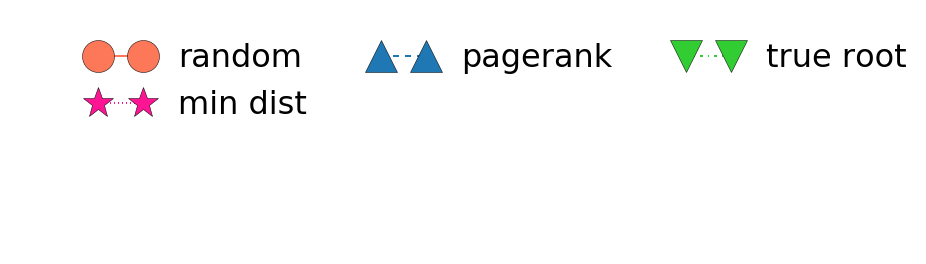

In [8]:
labels = ['random', 'min dist', 'pagerank', 'true root']
plot_legend(labels, 'method_legend_root_selection')

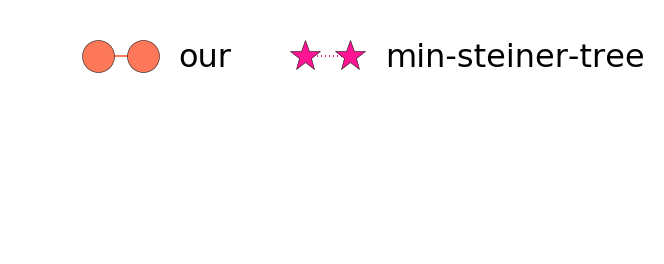

In [9]:
labels = ['our', 'min-steiner-tree']
plot_legend(labels, 'method_legend_edge')

In [25]:
def plot_cbar(labels, output, ticks=[0, 0.2, 0.85, 1]):
    plt.style.use('paper')
    a = np.array([[0,1]])
    fig = plt.figure(figsize=(4, 1.5))
    img = plt.imshow(a, cmap="Reds")
    plt.gca().set_visible(False)
    cax = plt.axes([0.11, 0.3, 0.8, 0.2])
    cbar = plt.colorbar(orientation="horizontal", cax=cax, ticks=ticks)
    cbar.ax.set_xticklabels([''] + labels + [''])
    cbar.outline.set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.tight_layout()
    plt.savefig(output)


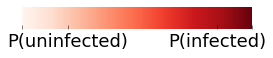

In [27]:
inputs = [(['P(uninfected)', 'P(infected)'], 'figs/case-study/cbar.pdf')]
for labels, o in inputs:
    plot_cbar(labels, o)